In [1]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
from sklearn_pandas import DataFrameMapper
from sklearn.svm import *  
from sklearn.tree import * 
from sklearn.datasets import load_breast_cancer

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [17]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

In [8]:
cancer.target.shape

(569,)

In [9]:
cancer.data.shape

(569, 30)

In [10]:
scaler= StandardScaler()

In [11]:
datacancer = scaler.fit_transform(cancer.data)

In [12]:
X_train, X_test, y_train, y_test= train_test_split(datacancer, cancer.target, random_state=0)

In [13]:
model = LogisticRegression().fit(X_train, y_train)

In [14]:
model.score(X_train, y_train)

0.9906103286384976

In [15]:
y_pred = model.predict(X_test)
model.score(X_test, y_pred)

1.0

In [16]:
model.score(X_test, y_test)

0.965034965034965

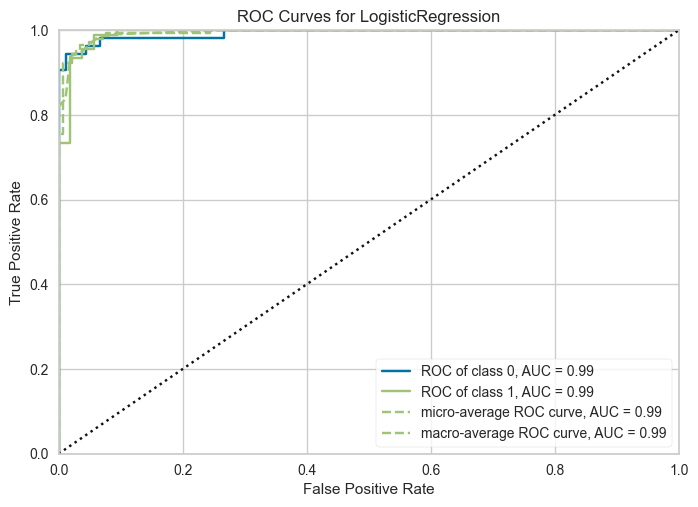

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [18]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()       

In [22]:
yHat = model.predict(X_test)
confusion_matrix(y_test, yHat)

array([[50,  3],
       [ 2, 88]])